异常值的处理方法

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf


from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties
from pylab import mpl


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


pd.set_option('display.max_columns', None)

In [24]:
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [25]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [26]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [27]:
Quarter_data = data_new.resample('Q')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Quarter_data

,Raw_return
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [28]:
Year_data = data_new.resample('Y')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame()
Year_data

,Raw_return
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


固定比例法

In [29]:
Month_data['1990-01':'2024-09']['Raw_return'].max()
Month_data['1990-01':'2024-09']['Raw_return'].min()

0.32055841729655343

-0.2463139446677537

In [30]:
Month_data_fix = Month_data['1990-01':'2024-09'].copy()
Month_data_fix

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [31]:
Month_data_fix[Month_data_fix['Raw_return'] > Month_data_fix['Raw_return'].quantile(
    0.99)] = Month_data_fix['Raw_return'].quantile(0.99)
Month_data_fix[Month_data_fix['Raw_return'] < Month_data_fix['Raw_return'].quantile(
    0.01)] = Month_data_fix['Raw_return'].quantile(0.01)
Month_data_fix

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [32]:
Month_data['1990-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_fix['1990-01':'2024-09']['Raw_return'].describe().round(8)

count    357.000000
mean       0.007448
std        0.076004
min       -0.246314
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.320558
Name: Raw_return, dtype: float64

count    357.000000
mean       0.007104
std        0.073350
min       -0.202144
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.215106
Name: Raw_return, dtype: float64

均值标准差法

In [33]:
Month_data_ms = Month_data['1990-01':'2024-09'].copy()

Month_data_ms[Month_data_ms['Raw_return'] >= Month_data_ms['Raw_return'].mean() +
         3 * Month_data_ms['Raw_return'].std()] = Month_data_ms['Raw_return'].mean(
         ) + 3 * Month_data_ms['Raw_return'].std()

Month_data_ms[Month_data_ms['Raw_return'] <= Month_data_ms['Raw_return'].mean() -
         3 * Month_data_ms['Raw_return'].std()] = Month_data_ms['Raw_return'].mean(
         ) - 3 * Month_data_ms['Raw_return'].std()
Month_data_ms

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [34]:
Month_data['1990-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_ms['1990-01':'2024-09']['Raw_return'].describe().round(8)

count    357.000000
mean       0.007448
std        0.076004
min       -0.246314
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.320558
Name: Raw_return, dtype: float64

count    357.000000
mean       0.007174
std        0.074304
min       -0.216924
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.235461
Name: Raw_return, dtype: float64

MAD法

In [35]:
Month_data_median = Month_data['1990-01':'2024-09'].copy()

median = np.median(Month_data_median['Raw_return'])
MAD = np.mean(abs(Month_data_median['Raw_return'] - median))

Month_data_median[Month_data_median['Raw_return'] >= 3 * MAD + median] = 3 * MAD + median
Month_data_median[Month_data_median['Raw_return'] <= -3 * MAD + median] = -3 * MAD + median

Month_data_median

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.170457
1995-04-30,-0.103552
1995-05-31,0.170457
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [36]:
Month_data['1990-01':'2024-09']['Raw_return'].describe().round(8)
Month_data_median['1990-01':'2024-09']['Raw_return'].describe().round(8)

count    357.000000
mean       0.007448
std        0.076004
min       -0.246314
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.320558
Name: Raw_return, dtype: float64

count    357.000000
mean       0.006814
std        0.069319
min       -0.161865
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.170457
Name: Raw_return, dtype: float64

参数假设检验

In [37]:
Month_data['1990-01':'2024-09']['Raw_return'].mean()

0.007447993081409216

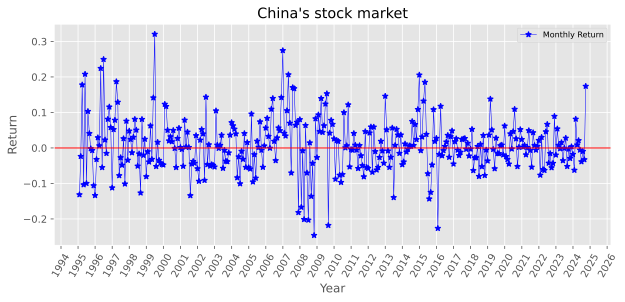

In [38]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot('Raw_return', 
'*-',
color = 'b', 
label = 'Monthly Return', 
linewidth = 0.5, 
data = Month_data['1990-01':]) 
ax.set_title("China's stock market")
ax.set_ylabel('Return') 
ax.set_xlabel('Year') 

plt.axhline(y=0, color='red', linewidth=1)

data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation = 60)

plt.legend(loc='upper right',fontsize = 8)
plt.show();


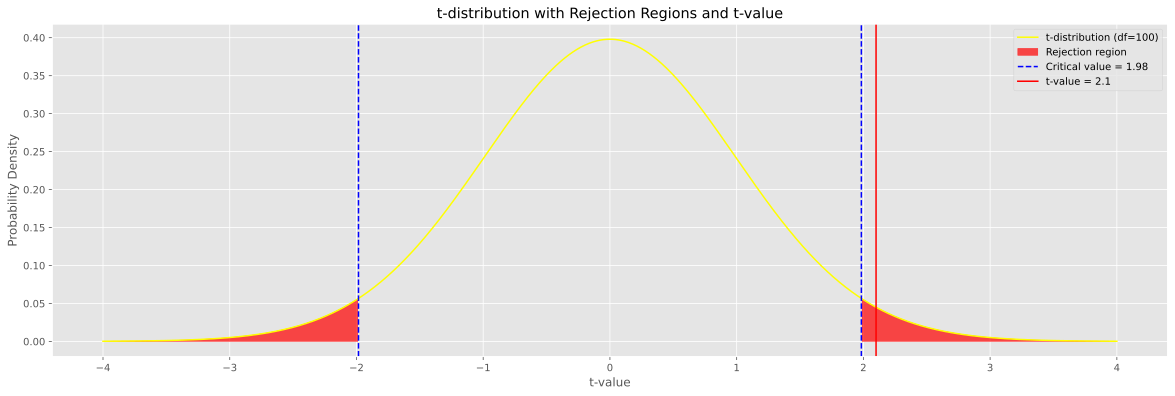

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

alpha = 0.05 
df = 100 
t_crit = stats.t.ppf(1 - alpha / 2, df) 

x = np.linspace(-4, 4, 1000) 
y = stats.t.pdf(x, df)

plt.figure(figsize=(20, 6)) 
plt.style.use('ggplot') 
plt.plot(x, y, label=f't-distribution (df={df})', color='yellow') 

plt.fill_between(x, 0, y, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.7, label='Rejection region')

plt.axvline(t_crit, color='blue', linestyle='--', label=f'Critical value = {t_crit:.2f}') 
plt.axvline(-t_crit, color='blue', linestyle='--') 

t_value = 2.1
plt.axvline(t_value, color='red', linestyle='-', label=f't-value = {t_value}')

plt.title('t-distribution with Rejection Regions and t-value')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()

plt.show();

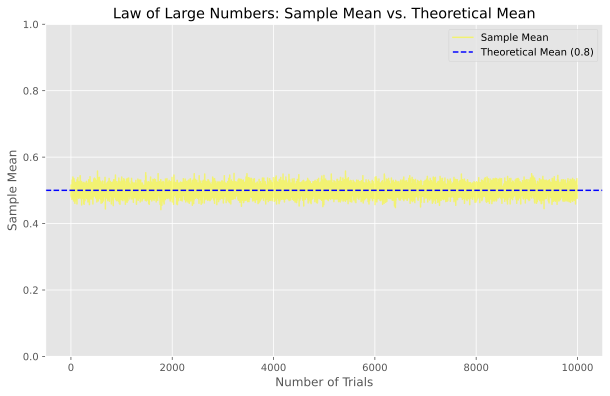

In [40]:
import numpy as np
import matplotlib.pyplot as plt

num_trials = 10000  
num_samples = 1000 
results = []  

# 模拟实验
for _ in range(num_trials):
    # 抛掷硬币，0代表正面，1代表反面
    samples = np.random.binomial(n=1, p=0.5, size=num_samples) 
    results.append(np.mean(samples)) 

theoretical_mean = 0.5  

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_trials + 1), results, label='Sample Mean', color='yellow', alpha=0.5)
plt.axhline(y=theoretical_mean, color='blue', linestyle='--', label='Theoretical Mean (0.8)')
plt.title('Law of Large Numbers: Sample Mean vs. Theoretical Mean')
plt.xlabel('Number of Trials')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) 
plt.show();


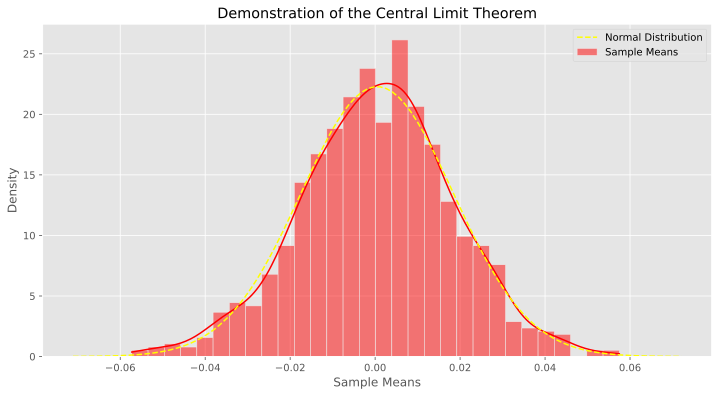

In [42]:
import seaborn as sns

num_samples = 1000 
num_trials = 1000  
sample_means = []  

for _ in range(num_trials):
    samples = np.random.uniform(low=-1, high=1, size=num_samples) 
    sample_means.append(np.mean(samples)) 


plt.figure(figsize=(12, 6))

sns.histplot(sample_means, bins=30, kde=True, color='red', stat='density', label='Sample Means')

mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='yellow', linestyle='--', label='Normal Distribution')

plt.title('Demonstration of the Central Limit Theorem')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show();